<h1>Problem Statement<h1/>
Image Classification using Deep CNN in Keras and also some edge detection operation.

# Dataset used here is fashion_mnist that contains 70,000 grayscale images of clothing at low resolution (28 by 28 pixels) in 10 categories as given below.



##  T-shirt/top:             0
## Trouser:                  1
## Pullover:                 2
## Dress:                     3
## Coat:                       4
## Sandal:                   5
## Shirt:                       6
## Sneaker:                 7
## Bag:                        8
## Ankel Boot:             9

## Importing all necessary modules

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras import datasets, models, layers, optimizers
plt.style.use('default')

C:\Users\HP\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Loading the Dataset.
fashion_mnist = tf.keras.datasets.fashion_mnist

# Splitting the dataset in train and test set.
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
# Printing the shape of dataset:

print('x_train shape :', x_train.shape)
print('x_test shape :', x_test.shape)
print('y_train shape :',y_train.shape)
print('y_test shape: ', y_test.shape)

x_train shape : (60000, 28, 28)
x_test shape : (10000, 28, 28)
y_train shape : (60000,)
y_test shape:  (10000,)


In [4]:
# Creating a label dictonary
label_dict = { 0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}

Label_id:  5 
Name:  Sandal


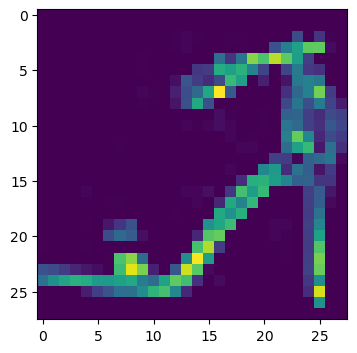

In [5]:
# Plotting the Image

plt.figure(figsize=(4,5))

i = 8
img = x_train[i]
label = y_train[i]
print('Label_id: ', label ,'\n' 'Name: ', label_dict[label])
plt.imshow(x_train[i])
plt.show()

In [6]:
# Convert labels to one hot vectors.

from sklearn.preprocessing import LabelBinarizer
le = LabelBinarizer()

Y_train = le.fit_transform(y_train)
Y_test = le.fit_transform(y_test)

print('Y_train shape: ', Y_train.shape)
print('Y_test shape: ', Y_test.shape)

Y_train shape:  (60000, 10)
Y_test shape:  (10000, 10)


The pixel values are in the range of 0 to 255.
Thus we will be normalizing the data by dividing the values by 255 (max value).

In [7]:
x_train.min()

0

In [8]:
x_train.max()

255

In [9]:
x_train = x_train.astype('float32') # Conversion to float type from integer type.
x_test = x_test.astype('float32')

# standardizing the values in x_train and x_test
x_train /= 255.0 # Division by 255
x_test /= 255.0

In [10]:
X_train = x_train.reshape(x_train.shape[0], 28, 28, 1) 
X_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


# Create model:
## 1. Convolutional input layer, applies 28 filters each of size 4×4, to input images with 'relu' as activation function.
## 2. Batch Normalization layer.
## 3. Max pool layer with size of 2x2
## 4. Dropout layer at 20%
----------------------------------------------------------------------------------------------------------------------------------
## 5. Convolutional input layer, applies 14 filters each of size 4×4, to input images with 'relu' as activation function.
## 6. Batch Normalization layer.
## 7. Max pool layer with size of 2x2
## 8. Dropout layer at 25%
-----------------------------------------------------------------------------------------------------------------------------------
## 9. Fully connected Dense laer with 'relu' as activation function.
## 10. Dropout layer at 25%
## 11. Fully connected Output layer with 'softmax' activation function.

In [11]:
X_train.shape[1:]

(28, 28, 1)

In [12]:
model = models.Sequential()
model.add(layers.Conv2D(28,(4, 4), padding= 'same', activation= 'relu', input_shape = X_train.shape[1:]))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(14,(4, 4), padding= 'same', activation= 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation= 'relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(10, activation= 'softmax'))

model.summary()

C:\Users\HP\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 28)     │           476 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 28)     │           112 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 28)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 28)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 14)     │         6,286 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 14)     │            56 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 14)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 14)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 686)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       175,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 185,372 (724.11 KB)

 Trainable params: 185,288 (723.78 KB)

 Non-trainable params: 84 (336.00 B)

In [13]:
X_train.shape[1:]

(28, 28, 1)

## Cost function used here is Adam optimizer.

In [14]:
opt = optimizers.Adam(learning_rate= 0.005)
model.compile(loss = 'categorical_crossentropy',
         optimizer = opt,
         metrics = ['accuracy'])

In [15]:
Y_train.shape[0]

60000

# Fit the model:


In [16]:
# Batch size and epochs are set as below
Batch_size = 200
Epoch = 25

Epoch 1/25
300/300 ━━━━━━━━━━━━━━━━━━━━ 55s 166ms/step - accuracy: 0.7459 - loss: 0.7959 - val_accuracy: 0.5730 - val_loss: 2.1842
Epoch 2/25
300/300 ━━━━━━━━━━━━━━━━━━━━ 48s 160ms/step - accuracy: 0.8657 - loss: 0.3622 - val_accuracy: 0.8833 - val_loss: 0.3233
Epoch 3/25
300/300 ━━━━━━━━━━━━━━━━━━━━ 83s 162ms/step - accuracy: 0.8824 - loss: 0.3151 - val_accuracy: 0.8982 - val_loss: 0.2782
Epoch 4/25
300/300 ━━━━━━━━━━━━━━━━━━━━ 83s 164ms/step - accuracy: 0.8939 - loss: 0.2880 - val_accuracy: 0.8920 - val_loss: 0.2837
Epoch 5/25
300/300 ━━━━━━━━━━━━━━━━━━━━ 49s 163ms/step - accuracy: 0.8957 - loss: 0.2752 - val_accuracy: 0.9051 - val_loss: 0.2520
Epoch 6/25
300/300 ━━━━━━━━━━━━━━━━━━━━ 49s 162ms/step - accuracy: 0.9079 - loss: 0.2511 - val_accuracy: 0.9054 - val_loss: 0.2492
Epoch 7/25
300/300 ━━━━━━━━━━━━━━━━━━━━ 49s 163ms/step - accuracy: 0.9086 - loss: 0.2438 - val_accuracy: 0.9063 - val_loss: 0.2586
Epoch 8/25
300/300 ━━━━━━━━━━━━━━━━━━━━ 49s 164ms/step - accuracy: 0.9110 - loss: 0

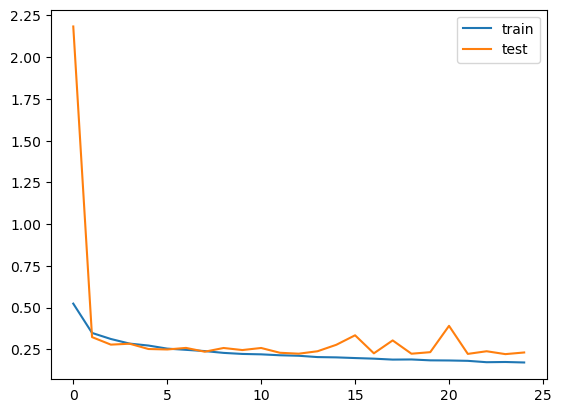

In [17]:
history = model.fit(X_train, Y_train,
                   batch_size= Batch_size,
                   epochs= Epoch,
                   validation_data= (X_test, Y_test),
                   verbose = 1)

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# Model Evaluation

In [18]:
# Score trained model.
scores = model.evaluate(X_test, Y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9155 - loss: 0.2421
Test loss: 0.23119696974754333
Test accuracy: 0.9175000190734863


In [19]:
# applying trained model to test data for getting predicitons.
pred = model.predict(X_test)
pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


array([[1.9952369e-12, 2.2949143e-12, 4.4302057e-13, ..., 3.0221311e-06,
        2.5172103e-10, 9.9999583e-01],
       [4.6329759e-04, 6.6272339e-12, 9.9948919e-01, ..., 1.5558259e-13,
        1.4107299e-07, 2.3696634e-14],
       [3.2468472e-16, 1.0000000e+00, 3.3177346e-18, ..., 1.2298037e-25,
        1.2840340e-17, 1.1255230e-23],
       ...,
       [4.2755546e-10, 2.0735078e-12, 2.7024454e-09, ..., 1.5313285e-08,
        9.9999988e-01, 1.2775785e-11],
       [1.1925129e-13, 1.0000000e+00, 2.8812707e-15, ..., 5.8845156e-21,
        3.7139066e-15, 1.1813866e-19],
       [2.6574301e-06, 5.6231197e-06, 1.6079784e-05, ..., 4.5660455e-03,
        1.2091134e-03, 3.0474521e-05]], dtype=float32)

In [20]:
# The predcited values are the predicted probabilities of each class, the below function will convert predicted probabilities into the predicted class label.
t_pred = pd.DataFrame(model.predict(X_test, batch_size= 300))
t_pred = pd.DataFrame(t_pred.values.argmax(axis=1))
t_pred

34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


,0
0,9
1,2
2,1
3,1
4,6
...,...
9995,9
9996,1
9997,8
9998,1


In [21]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

## Creating Error dataframe: here difference between orignal labels and predicted labels is evaluated.
## The correctly predicted labels are those where difference is zero.

In [22]:
error = pd.DataFrame(columns= ['Orignal_labels', 'Predicted_labels'])

In [23]:
error['Orignal_labels'] = y_test
error['Predicted_labels'] = t_pred
error['Error'] = error['Orignal_labels'] - error['Predicted_labels']

In [24]:
error

,Orignal_labels,Predicted_labels,Error
0,9,9,0
1,2,2,0
2,1,1,0
3,1,1,0
4,6,6,0
...,...,...,...
9995,9,9,0
9996,1,1,0
9997,8,8,0
9998,1,1,0


In [25]:
error['Error'].value_counts()

 0    9175
 2     188
-2     153
 6     137
-6      72
 4      66
 1      60
-4      45
 3      40
-3      31
-1      14
-8       7
-5       4
 8       3
 5       2
-7       2
 7       1
Name: Error, dtype: int64

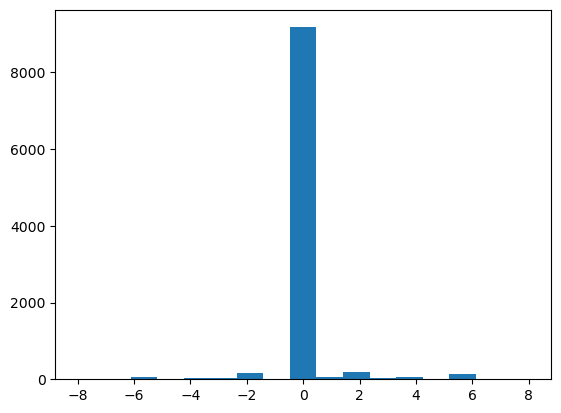

In [26]:
plt.hist(error['Error'], bins= 17)
plt.show()